In [8]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

from keras.applications.vgg16 import VGG16
from keras import models
from keras import layers

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

model = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(128, activation="relu"),
   layers.Dense(10, activation="softmax"),
])
model.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
#test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


In [ ]:
type(train_images)

numpy.ndarray

In [ ]:
type(test_images)

numpy.ndarray

In [11]:
train_images.resize(60000, 32, 32, 3, refcheck=False)

In [12]:
test_images.resize(10000, 32, 32, 3, refcheck=False)

In [45]:
type(train_images)

numpy.ndarray

In [ ]:
type(test_images)

numpy.ndarray

In [13]:
train_image = train_images[:50000]
val_image = train_images[50000:]
train_label = train_labels[:50000]
val_label = train_labels[50000:]

In [14]:
type(train_image)

numpy.ndarray

In [15]:
type(val_image)

numpy.ndarray

In [16]:
history = model.fit(
    train_image, 
    train_label, 
    batch_size=64,
    epochs=10,
    validation_data = (val_image, val_label)
    )

Epoch 1/10
782/782 [==============================] - 35s 34ms/step - loss: 2.3157 - categorical_accuracy: 0.0999 - val_loss: 2.3056 - val_categorical_accuracy: 0.1023
Epoch 2/10
782/782 [==============================] - 24s 31ms/step - loss: 2.3051 - categorical_accuracy: 0.1020 - val_loss: 2.3028 - val_categorical_accuracy: 0.0970
Epoch 3/10
782/782 [==============================] - 24s 31ms/step - loss: 2.3028 - categorical_accuracy: 0.1032 - val_loss: 2.3036 - val_categorical_accuracy: 0.0996
Epoch 4/10
782/782 [==============================] - 24s 30ms/step - loss: 2.3027 - categorical_accuracy: 0.1017 - val_loss: 2.3030 - val_categorical_accuracy: 0.0996
Epoch 5/10
782/782 [==============================] - 26s 33ms/step - loss: 2.3025 - categorical_accuracy: 0.1005 - val_loss: 2.3043 - val_categorical_accuracy: 0.0996
Epoch 6/10
782/782 [==============================] - 25s 32ms/step - loss: 2.3022 - categorical_accuracy: 0.1021 - val_loss: 2.3029 - val_categorical_accuracy:

In [17]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

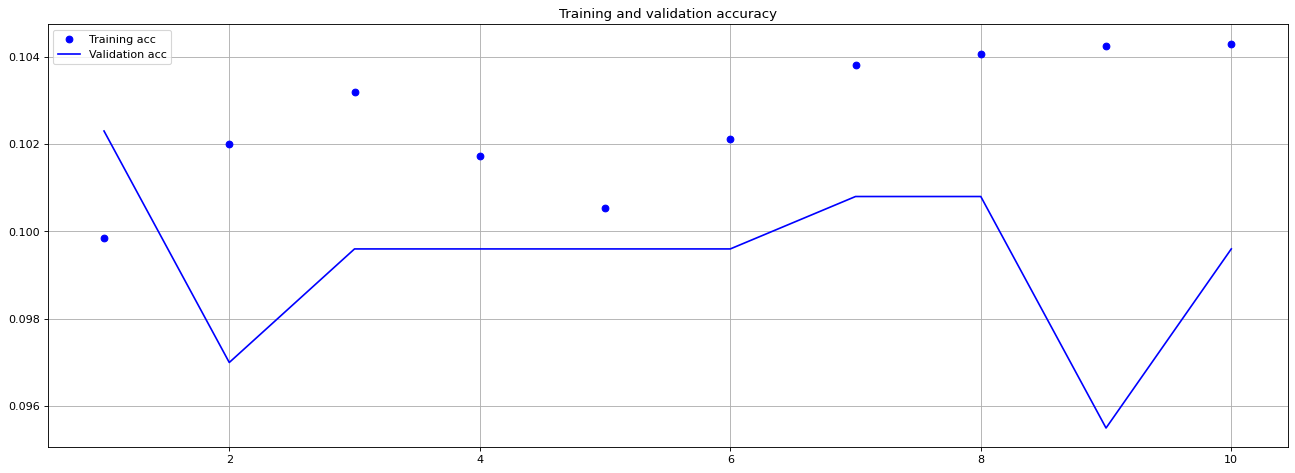

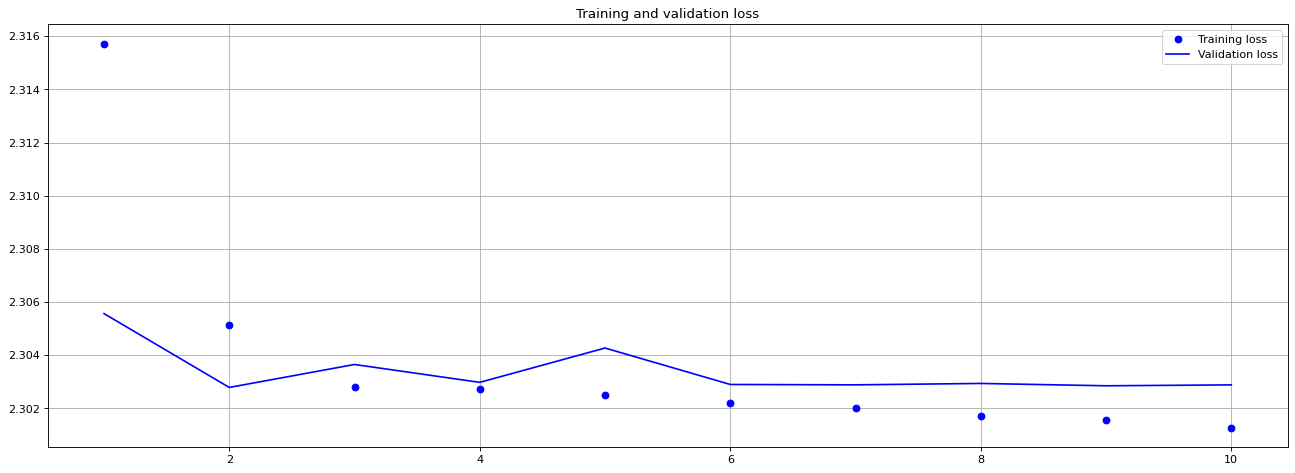

In [18]:
import matplotlib.pyplot as plt

acc = history.history["categorical_accuracy"]
val_acc = history.history["val_categorical_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [19]:
print(model.predict(test_images[1892].reshape(1, 32,32,3)).argmax())
print(test_labels[1892].argmax())

7
4


In [ ]:
model.save("/content/drive/MyDrive/prepared_train_data/models/vgg16_basesd_model.hdf5")

In [20]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [21]:
trainable_layers = [
    "block5_conv1", "block5_conv2", "block5_conv3", "block5_pool"
]
conv_base.trainable = True
for layer in conv_base.layers:
    if layer.name not in trainable_layers:
        layer.trainable = False

In [22]:
model1 = models.Sequential([
   conv_base,
   layers.Flatten(),
   layers.Dense(128, activation="relu"),
   layers.Dense(10, activation="softmax"),
])

model1.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-5),
    metrics=[tf.keras.metrics.CategoricalAccuracy()]
)

In [23]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               65664     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 7,146,378
Non-trainable params: 7,635,264
_________________________________________________________________


In [24]:
history = model1.fit(
    train_image,
    train_label,
    batch_size=128,
    epochs=15,
    validation_data = (val_image, val_label)
)

Epoch 1/15
391/391 [==============================] - 32s 71ms/step - loss: 2.3083 - categorical_accuracy: 0.0981 - val_loss: 2.3044 - val_categorical_accuracy: 0.1023
Epoch 2/15
391/391 [==============================] - 27s 68ms/step - loss: 2.3042 - categorical_accuracy: 0.1019 - val_loss: 2.3047 - val_categorical_accuracy: 0.0968
Epoch 3/15
391/391 [==============================] - 29s 74ms/step - loss: 2.3028 - categorical_accuracy: 0.1039 - val_loss: 2.3037 - val_categorical_accuracy: 0.1008
Epoch 4/15
391/391 [==============================] - 26s 67ms/step - loss: 2.3020 - categorical_accuracy: 0.1038 - val_loss: 2.3035 - val_categorical_accuracy: 0.0970
Epoch 5/15
391/391 [==============================] - 26s 67ms/step - loss: 2.3009 - categorical_accuracy: 0.1081 - val_loss: 2.3026 - val_categorical_accuracy: 0.1021
Epoch 6/15
391/391 [==============================] - 26s 67ms/step - loss: 2.2998 - categorical_accuracy: 0.1075 - val_loss: 2.3038 - val_categorical_accuracy:

In [25]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

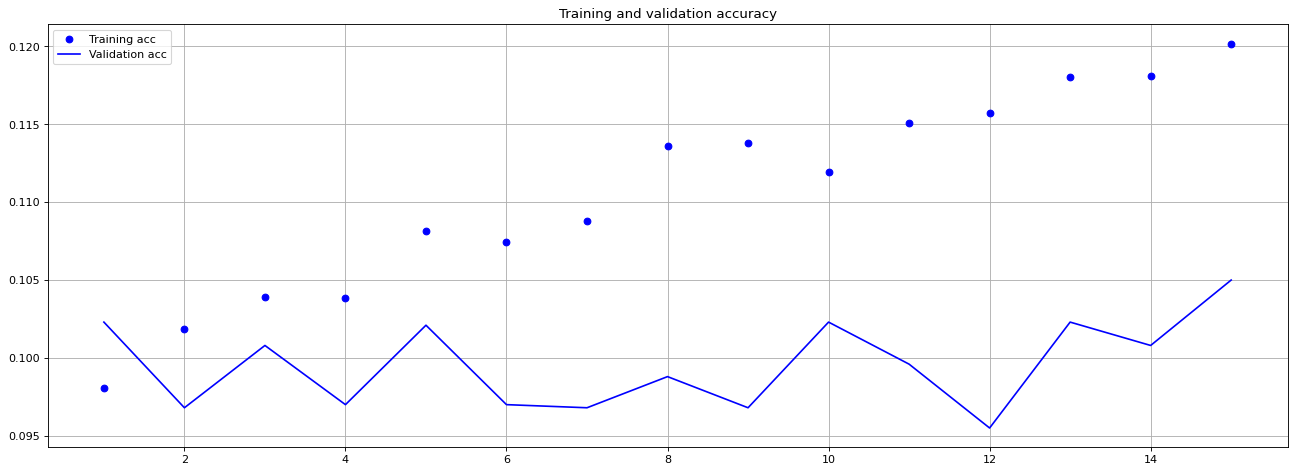

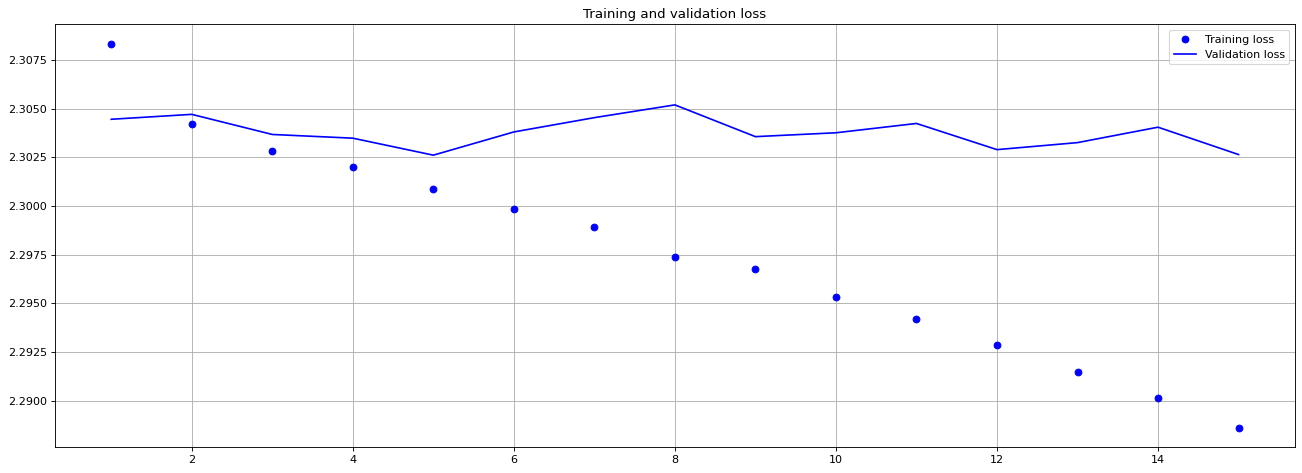

In [26]:
import matplotlib.pyplot as plt

acc = history.history["categorical_accuracy"]
val_acc = history.history["val_categorical_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")

plt.title("Training and validation accuracy")
plt.legend()

plt.figure(figsize=(20, 7), dpi=80)
plt.grid(True)

plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss") 
plt.title("Training and validation loss")

plt.legend()
plt.show()

In [27]:
model1.predict(test_images[5].reshape(1, 32,32,3))

array([[0.10324325, 0.10746153, 0.09725512, 0.10515996, 0.0887966 ,
        0.10782966, 0.07602903, 0.09326753, 0.08986528, 0.13109207]],
      dtype=float32)